In [2]:
!wget https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv

--2023-10-05 11:53:53--  https://raw.githubusercontent.com/alexeygrigorev/mlbookcamp-code/master/chapter-02-car-price/data.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1475504 (1.4M) [text/plain]
Saving to: ‘data.csv.3’

data.csv.3          100%[===================>]   1.41M  7.83MB/s    in 0.2s    

2023-10-05 11:53:54 (7.83 MB/s) - ‘data.csv.3’ saved [1475504/1475504]



In [3]:
import numpy as np


In [4]:
import pandas as pd

In [5]:
df = pd.read_csv("data.csv.3")

In [9]:
df.columns=df.columns.str.lower().str.replace(' ', '_')

In [21]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [18]:
df.fillna(0)

In [13]:
df=df[['make', 'model', 'year',  'engine_hp',
       'engine_cylinders', 'transmission_type', 'vehicle_style',
       'highway_mpg', 'city_mpg', 'msrp']]

In [19]:
df.isnull().sum()

make                 0
model                0
year                 0
engine_hp            0
engine_cylinders     0
transmission_type    0
vehicle_style        0
highway_mpg          0
city_mpg             0
msrp                 0
dtype: int64

In [23]:
price_mean=df['msrp'].mean()
price_mean

40594.737032063116

In [24]:
df['msrp']= np.where(df['msrp'] > price_mean,1,0)

In [32]:
df.rename(columns = {'price': 'above_average'}, inplace=True)

In [103]:
df.dtypes

make                  object
model                 object
year                   int64
engine_hp            float64
engine_cylinders     float64
transmission_type     object
vehicle_style         object
highway_mpg            int64
city_mpg               int64
above_average          int64
dtype: object

In [271]:
numerical = list (df.dtypes[df.dtypes!='object'].index)

In [272]:
numerical

['year',
 'engine_hp',
 'engine_cylinders',
 'highway_mpg',
 'city_mpg',
 'above_average']

In [273]:
df_num = df[numerical]

In [274]:
df_num

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,above_average
0,2011,335.0,6.0,26,19,1
1,2011,300.0,6.0,28,19,1
2,2011,300.0,6.0,28,20,0
3,2011,230.0,6.0,28,18,0
4,2011,230.0,6.0,28,18,0
...,...,...,...,...,...,...
11909,2012,300.0,6.0,23,16,1
11910,2012,300.0,6.0,23,16,1
11911,2012,300.0,6.0,23,16,1
11912,2013,300.0,6.0,23,16,1


In [221]:
from sklearn.metrics import auc

In [275]:
df_num.corr()

,year,engine_hp,engine_cylinders,highway_mpg,city_mpg,above_average
year,1.000000,0.338714,-0.040708,0.258240,0.198171,0.318311
engine_hp,0.338714,1.000000,0.774851,-0.415707,-0.424918,0.660518
engine_cylinders,-0.040708,0.774851,1.000000,-0.614541,-0.587306,0.448907
highway_mpg,0.258240,-0.415707,-0.614541,1.000000,0.886829,-0.133440
city_mpg,0.198171,-0.424918,-0.587306,0.886829,1.000000,-0.149233
above_average,0.318311,0.660518,0.448907,-0.133440,-0.149233,1.000000


In [276]:
for col in ['engine_hp','engine_cylinders','highway_mpg','city_mpg']:
    area=0
    dfcol_scaled=df[col]/df[col].max()
    for j in np.arange(1,df.shape[0]):
        #dfi=df.sort_values(by=i)[i]
        
        #dfa=df.sort_values(by=['above_average'])['above_average']
        
        #area = auc(dfi_scaled,dfa)
        #area = area + (dfcol_scaled[j]-dfcol_scaled[j-1])* (df['above_average'][j]+df['above_average'][j-1])/2
        area = area + (dfcol_scaled[j]+dfcol_scaled[j-1])* (df['above_average'][j]-df['above_average'][j-1])/2

    print (col, area)
    

engine_hp -1.1518481518481527
engine_cylinders 0.3125
highway_mpg -0.6412429378531075
city_mpg -2.419708029197083


# Answer - 2

In [34]:
from sklearn.model_selection import train_test_split

In [44]:
df_fulltrain, df_test=train_test_split(df, test_size=0.2, random_state=1)

In [45]:
df_train, df_val=train_test_split(df_fulltrain, test_size=0.25, random_state=1)

In [48]:
dfX_train = df_train[['make', 'model', 'year',  'engine_hp',
       'engine_cylinders', 'transmission_type', 'vehicle_style',
       'highway_mpg', 'city_mpg']]
dfX_val = df_val[['make', 'model', 'year',  'engine_hp',
       'engine_cylinders', 'transmission_type', 'vehicle_style',
       'highway_mpg', 'city_mpg']]
dfX_test = df_test[['make', 'model', 'year',  'engine_hp',
       'engine_cylinders', 'transmission_type', 'vehicle_style',
       'highway_mpg', 'city_mpg']]

In [47]:
y_train = df_train['above_average']
y_val = df_val['above_average']
y_test = df_test['above_average']

In [50]:
dictX_train= dfX_train.to_dict(orient='records')
dictX_val= dfX_val.to_dict(orient='records')
dictX_test= dfX_test.to_dict(orient='records')

In [ ]:
X_train_dict = dv.fit(X_train_dict)

In [39]:
from sklearn.feature_extraction import DictVectorizer

In [41]:
dv = DictVectorizer(sparse=True)

In [51]:
dv.fit(dictX_train)

DictVectorizer()

In [52]:
X_train = dv.transform(dictX_train)
X_val = dv.transform(dictX_val)
X_test = dv.transform(dictX_test)

In [56]:
from sklearn.linear_model import LogisticRegression

In [57]:
lv=LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)

In [58]:
lv.fit(X_train, y_train)

LogisticRegression(max_iter=1000, solver='liblinear')

In [73]:
y_val_pred = lv.predict_proba(X_val)[:,1]

In [61]:
from sklearn.metrics import auc
from sklearn.metrics import roc_curve

In [74]:
y_val_pred

array([0.64240495, 0.01506024, 0.48519413, ..., 0.00528823, 0.99998724,
       0.09593936])

In [81]:
fpr, tpr, thresholds = roc_curve(y_val, y_val_pred)

In [83]:
aoc_value=auc(fpr,tpr)
round(aoc_value,3)

0.977

In [84]:
from sklearn.metrics import roc_auc_score

In [85]:
area_under_roc = roc_auc_score(y_val,y_val_pred)

In [86]:
round(aoc_value,3)

0.977

# Answer - 3

In [126]:

thresholds

array([0.  , 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 ,
       0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21,
       0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32,
       0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43,
       0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54,
       0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65,
       0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76,
       0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87,
       0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98,
       0.99, 1.  ])

In [156]:


thresholds = np.linspace(0,1,101)

scores = []
for t in thresholds:
    actual_positive= (y_val==1)
    actual_negative= (y_val==0)


    high_price = (y_val_pred >= t)
    score = (y_val == high_price).mean()

    predict_positive= (high_price==1)
    predict_negative=(high_price==0)
    
    tp=(predict_positive & actual_positive).sum()
    tn=(predict_negative & actual_negative).sum()
    fp=(predict_positive & actual_negative).sum()
    fn=(predict_negative & actual_positive).sum()
    

    #confusion_matrix = np.array[[tn,fp],[fn,tp]]
    scores.append((t,tp,fp,tn,fn))
    #print ("%.2f, %.3f", t, score,actual_positive,)

In [157]:
scores

[(0.0, 654, 1729, 0, 0),
 (0.01, 652, 839, 890, 2),
 (0.02, 651, 680, 1049, 3),
 (0.03, 651, 592, 1137, 3),
 (0.04, 650, 543, 1186, 4),
 (0.05, 649, 481, 1248, 5),
 (0.06, 648, 444, 1285, 6),
 (0.07, 648, 419, 1310, 6),
 (0.08, 647, 402, 1327, 7),
 (0.09, 645, 377, 1352, 9),
 (0.1, 643, 345, 1384, 11),
 (0.11, 643, 323, 1406, 11),
 (0.12, 641, 309, 1420, 13),
 (0.13, 640, 286, 1443, 14),
 (0.14, 638, 276, 1453, 16),
 (0.15, 637, 266, 1463, 17),
 (0.16, 636, 260, 1469, 18),
 (0.17, 633, 254, 1475, 21),
 (0.18, 630, 241, 1488, 24),
 (0.19, 626, 228, 1501, 28),
 (0.2, 622, 218, 1511, 32),
 (0.21, 622, 214, 1515, 32),
 (0.22, 621, 209, 1520, 33),
 (0.23, 620, 202, 1527, 34),
 (0.24, 616, 192, 1537, 38),
 (0.25, 613, 189, 1540, 41),
 (0.26, 611, 177, 1552, 43),
 (0.27, 608, 171, 1558, 46),
 (0.28, 608, 168, 1561, 46),
 (0.29, 606, 162, 1567, 48),
 (0.3, 606, 159, 1570, 48),
 (0.31, 603, 148, 1581, 51),
 (0.32, 601, 146, 1583, 53),
 (0.33, 598, 141, 1588, 56),
 (0.34, 596, 136, 1593, 58),
 (

In [158]:
columns = ['threshold','tp','fp','tn','fn']

In [159]:
df_scores = pd.DataFrame(scores, columns=columns)

In [179]:
df_scores['precision'] = df_scores.tp/ (df_scores.tp+df_scores.fp)
df_scores['recall'] = df_scores.tp/ (df_scores.tp+df_scores.fn)
df_scores['diff']=round (df_scores.recall-df_scores.precision,4)
df_scores['F1Score']= 2 * (df_scores.recall)*(df_scores.precision)/(df_scores.recall+df_scores.precision)


In [187]:
df_scores[45:60:1]

,threshold,tp,fp,tn,fn,precision,recall,diff,F1Score
45,0.45,578,96,1633,76,0.857567,0.883792,0.0262,0.870482
46,0.46,573,91,1638,81,0.862952,0.876147,0.0132,0.869499
47,0.47,573,87,1642,81,0.868182,0.876147,0.0080,0.872146
48,0.48,570,87,1642,84,0.867580,0.871560,0.0040,0.869565
49,0.49,567,80,1649,87,0.876352,0.866972,-0.0094,0.871637
50,0.50,567,76,1653,87,0.881804,0.866972,-0.0148,0.874325
51,0.51,564,76,1653,90,0.881250,0.862385,-0.0189,0.871716
52,0.52,562,73,1656,92,0.885039,0.859327,-0.0257,0.871994
53,0.53,559,68,1661,95,0.891547,0.854740,-0.0368,0.872756
54,0.54,557,65,1664,97,0.895498,0.851682,-0.0438,0.873041


In [185]:
print (df_scores[df_scores.F1Score == df_scores.F1Score.max()])

    threshold   tp  fp    tn  fn  precision    recall    diff   F1Score
50        0.5  567  76  1653  87   0.881804  0.866972 -0.0148  0.874325


In [188]:
df_scores.F1Score.max()

0.8743253662297611

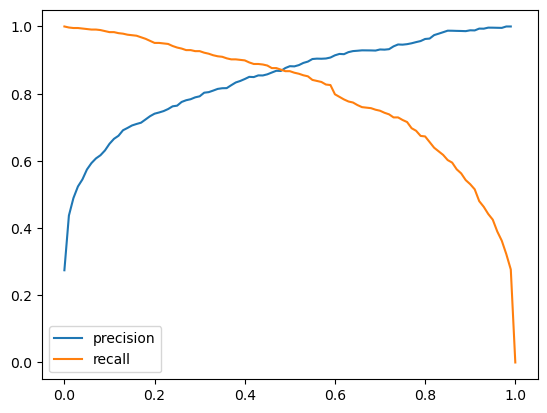

In [167]:
plt.plot(df_scores.threshold,df_scores['precision'],label='precision')
plt.plot(df_scores.threshold,df_scores['precision'],label='recall')                                                          

In [132]:
import matplotlib.pyplot as plt

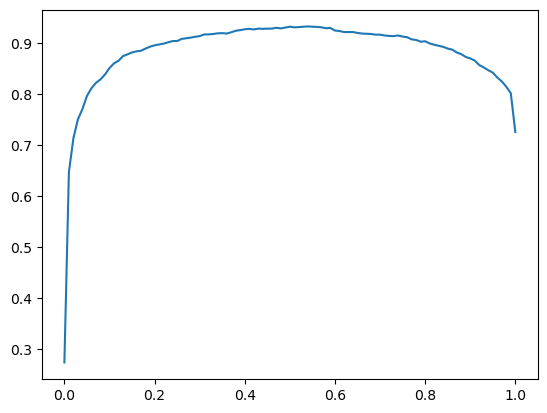

In [135]:
plt.plot(threshold,scores)

# Answer  - 4

In [ ]:
# Highest F1 at .50

# Answer - 5

In [197]:
def train(df_train, y_train):
    dv = DictVectorizer(sparse=False)
    dict_df_train= df_train.to_dict(orient='records')
    dict_df_train_x=dv.fit_transform(dict_df_train)
    
    model = LogisticRegression(solver='liblinear', C=1.0, max_iter=1000)
    model.fit(dict_df_train_x,y_train)
    return model, dv
    

In [198]:
#log_model,dv = train(dfx_train, y_train)

In [199]:
def predict(df_val,log_model,dv):
        dict_df_val= df_val.to_dict(orient='records')
        dict_df_val_x=dv.transform(dict_df_val)
        
        v_val_pred = log_model.predict_proba(dict_df_val_x)[:,1]
        return v_val_pred    


In [201]:
#y_pred = predict(df_val,log_model,dv)

In [203]:
from sklearn.model_selection import KFold

In [204]:
kfold = KFold(n_splits=5 , shuffle=True, random_state=1)

In [211]:
df_fulltrain, df_test=train_test_split(df, test_size=0.2, random_state=1)

In [212]:
scores = []
for train_idx, val_idx in kfold.split(df_fulltrain):

    
    df_k_train = df_fulltrain.iloc[train_idx]
    df_k_val=df_fulltrain.iloc[val_idx]
    
    df_k_train_x = df_k_train[['make', 'model', 'year',  'engine_hp',
       'engine_cylinders', 'transmission_type', 'vehicle_style',
       'highway_mpg', 'city_mpg']]
    y_train_k = df_k_train.above_average.values
    
    df_k_val_x = df_k_val[['make', 'model', 'year',  'engine_hp',
       'engine_cylinders', 'transmission_type', 'vehicle_style',
       'highway_mpg', 'city_mpg']]
    y_val_k = df_k_val.above_average.values
        
    
    log_model,dv = train(df_k_train_x, y_train_k)
    y_val_k_pred = predict(df_k_val_x,log_model,dv)
    
    auc= roc_auc_score(y_val_k,y_val_k_pred)
    scores.append(auc)
    
    

In [213]:
scores

[0.9784891235596622,
 0.9802015987157496,
 0.977745245663934,
 0.9772628408900788,
 0.9776806526806527]

In [215]:
round(np.mean(scores),3), round(np.std(scores),3)

(0.978, 0.001)

# Answer - 6

In [216]:
def train_c(df_train, y_train,c):
    dv = DictVectorizer(sparse=False)
    dict_df_train= df_train.to_dict(orient='records')
    dict_df_train_x=dv.fit_transform(dict_df_train)
    
    model = LogisticRegression(solver='liblinear', C=c, max_iter=1000)
    model.fit(dict_df_train_x,y_train)
    return model, dv 

In [219]:

for c in [0.01, 0.1, 0.5, 10]:
    scores = []
    for train_idx, val_idx in kfold.split(df_fulltrain):

    
        df_k_train = df_fulltrain.iloc[train_idx]
        df_k_val=df_fulltrain.iloc[val_idx]
    
        df_k_train_x = df_k_train[['make', 'model', 'year',  'engine_hp',
       'engine_cylinders', 'transmission_type', 'vehicle_style',
       'highway_mpg', 'city_mpg']]
        y_train_k = df_k_train.above_average.values
    
        df_k_val_x = df_k_val[['make', 'model', 'year',  'engine_hp',
       'engine_cylinders', 'transmission_type', 'vehicle_style',
       'highway_mpg', 'city_mpg']]
        y_val_k = df_k_val.above_average.values
        
    
        log_model,dv = train_c(df_k_train_x, y_train_k,c)
        y_val_k_pred = predict(df_k_val_x,log_model,dv)
    
        auc= roc_auc_score(y_val_k,y_val_k_pred)
        scores.append(auc)
    print (c, round(np.mean(scores),3), round(np.std(scores),3))

0.01 0.952 0.003
0.1 0.972 0.002
0.5 0.977 0.001
10 0.98 0.003
